In [5]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
         swap = i + np.argmin(x[i:])
         (x[i], x[swap]) = (x[swap], x[i])
    return x

In [6]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [12]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [13]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [14]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [16]:
x.sort()
print(x)

[1 2 3 4 5]


In [17]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [18]:
x[i]

array([1, 2, 3, 4, 5])

In [9]:
y = np.array([3, 2, 7, 4])
y.sort()
print(y)

[2 3 4 7]


In [31]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [35]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [36]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [70]:
X = rand.rand(10, 2)
print(X)

[[0.92630088 0.65107703]
 [0.91495968 0.85003858]
 [0.44945067 0.09541012]
 [0.37081825 0.66884125]
 [0.66592236 0.59129779]
 [0.27472179 0.56124343]
 [0.38292687 0.9717121 ]
 [0.84891382 0.72172952]
 [0.23598492 0.25606832]
 [0.04043359 0.71066289]]


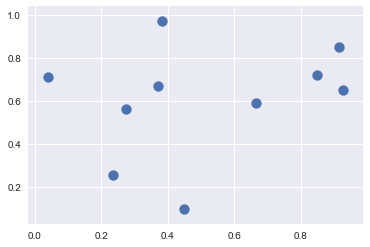

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #プロットのスタイル
plt.scatter(X[:, 0], X[:, 1], s=100);

In [72]:
# dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

# 各点の組み合わせに対して、座標ごとの差を計算する
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [73]:
# 差を二乗する
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [74]:
# 差の2乗を合計して、2乗距離を求める
dist_sq = differences.sum(-1)
dist_sq.shape

(10, 10)

In [75]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]
 [1 0 7 6 4 3 5 9 2 8]]


In [77]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

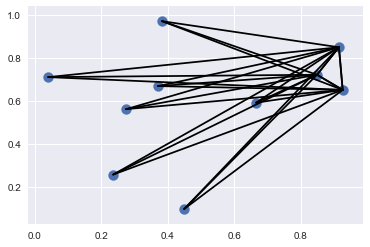

In [78]:
plt.scatter(X[:, 0], X[:, 1], s=100)

#　各点からそれぞれ2つの近傍へ線を引く
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        #　X[i]からX[j]への線を描くためにzipを使ったトリックをする
        plt.plot(*zip(X[j], X[i]), color='black')